In [50]:
import pandas as pd

In [51]:
df = pd.read_csv("../../25/Invistico_Airline (1).csv")

In [52]:
df.shape

(129880, 22)

In [53]:
df.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [54]:
df.isna().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [55]:
df.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

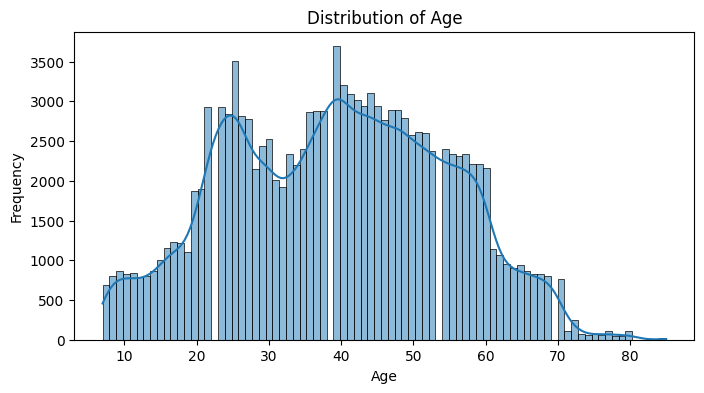

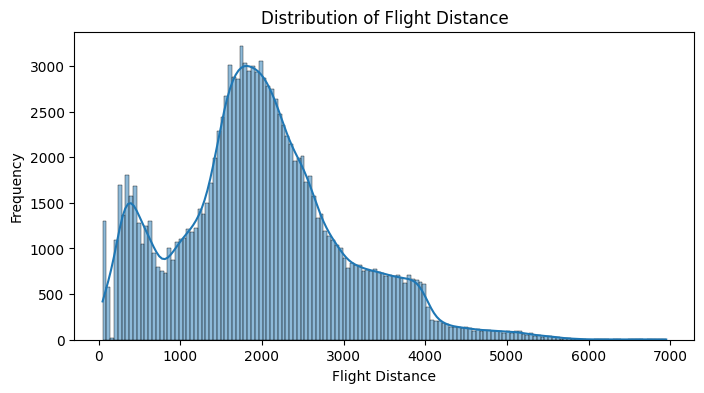

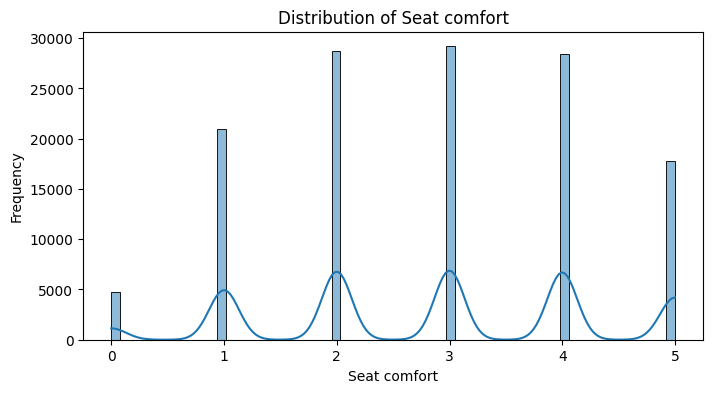

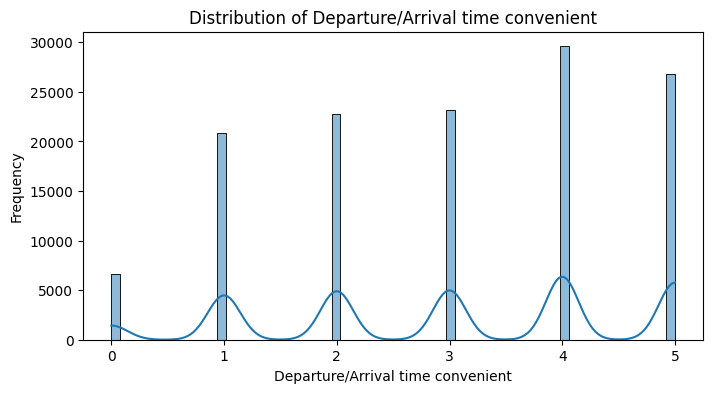

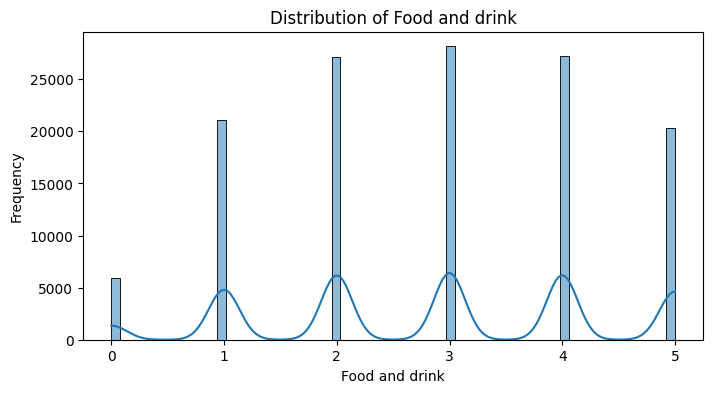

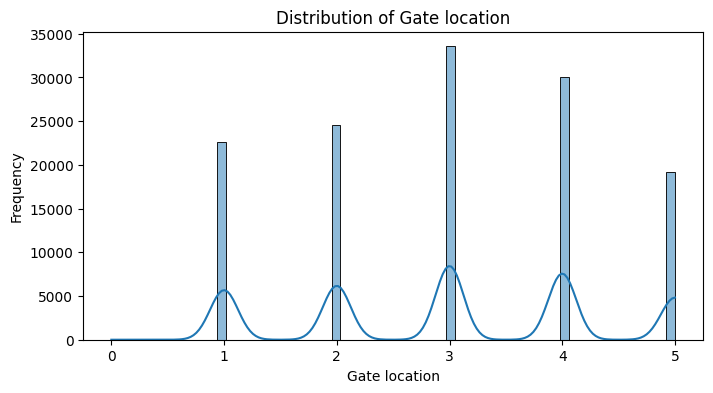

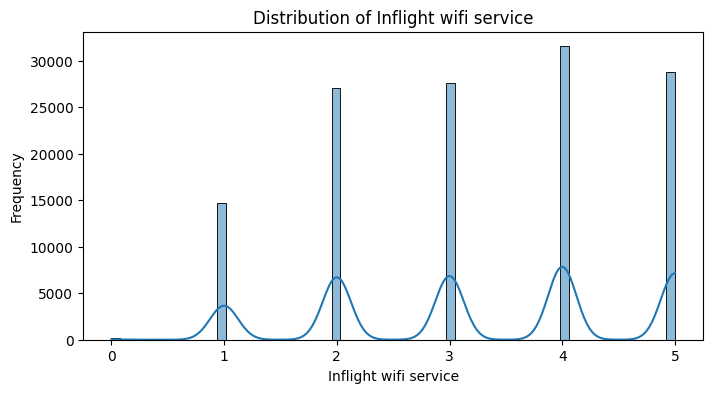

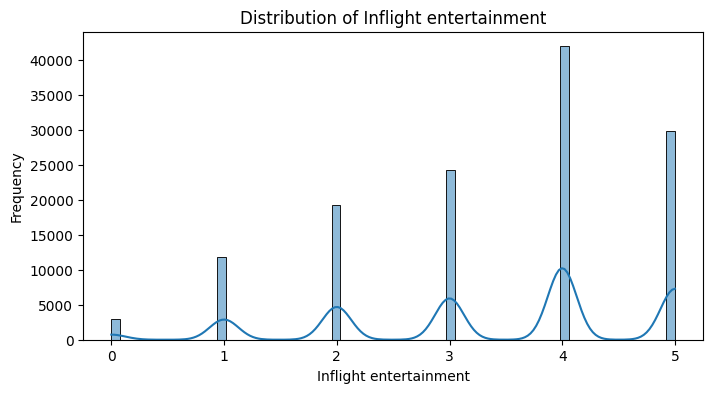

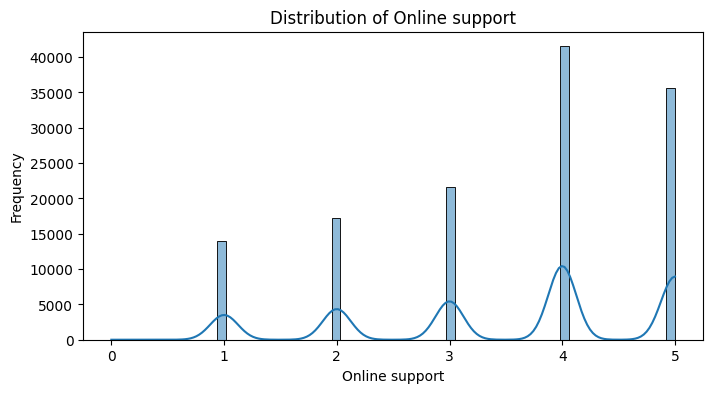

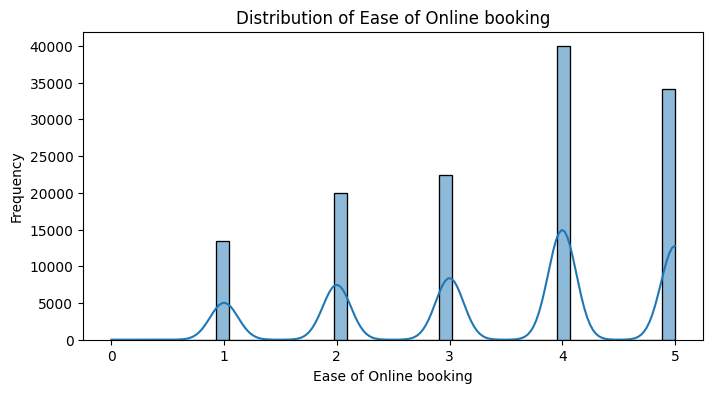

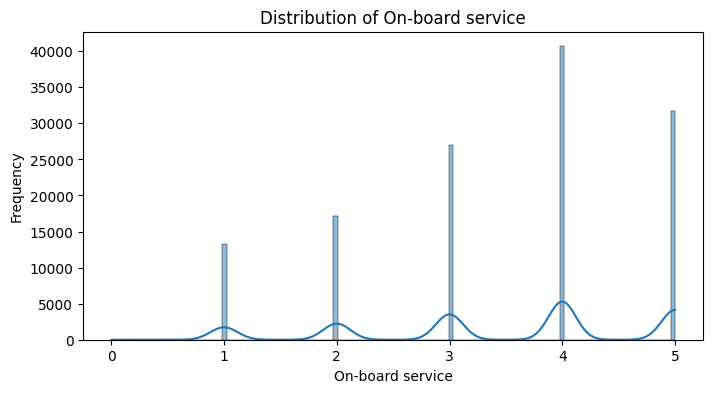

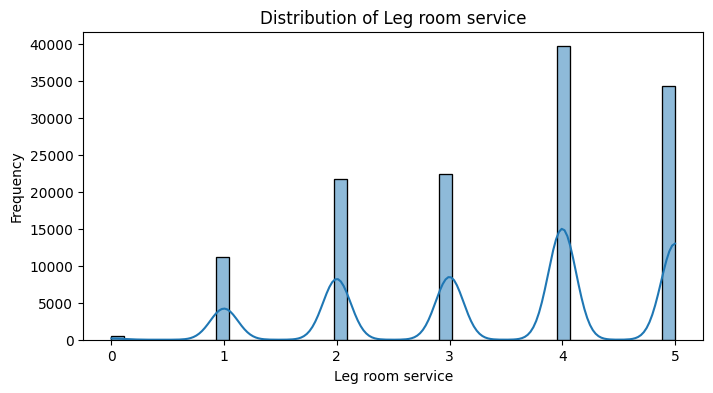

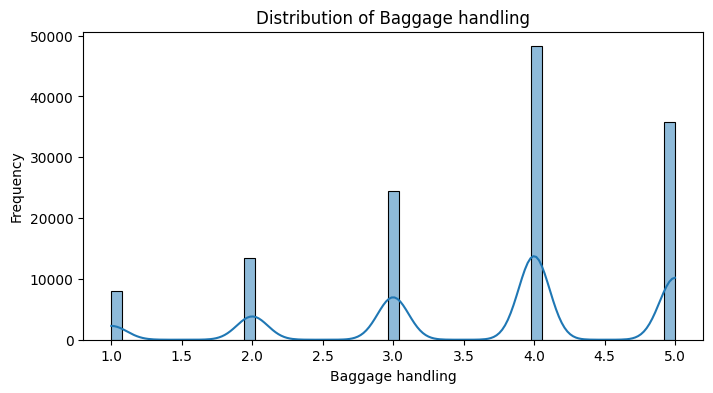

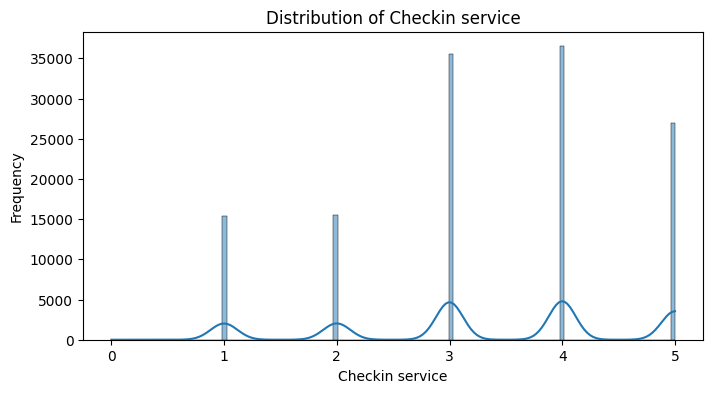

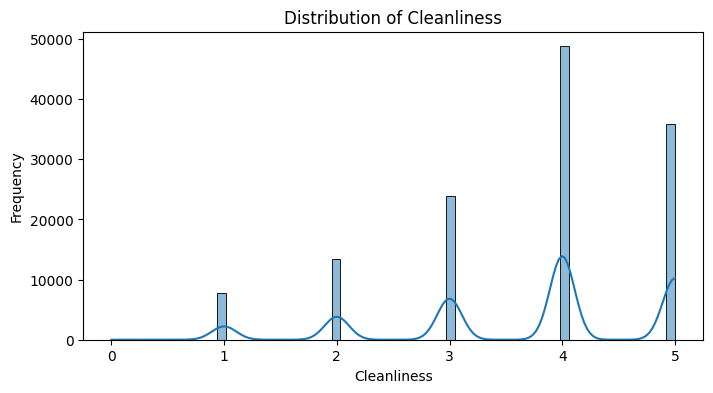

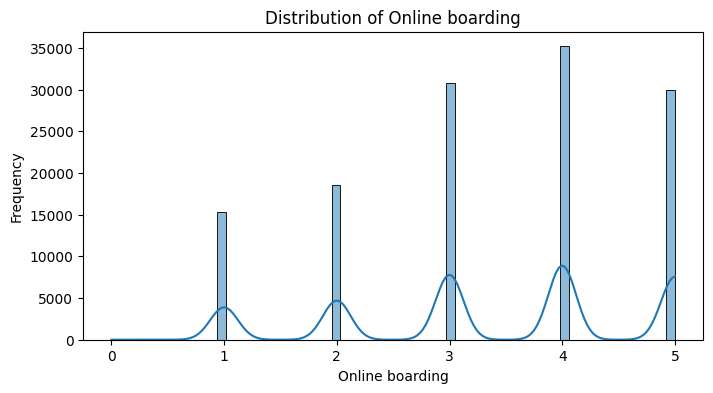

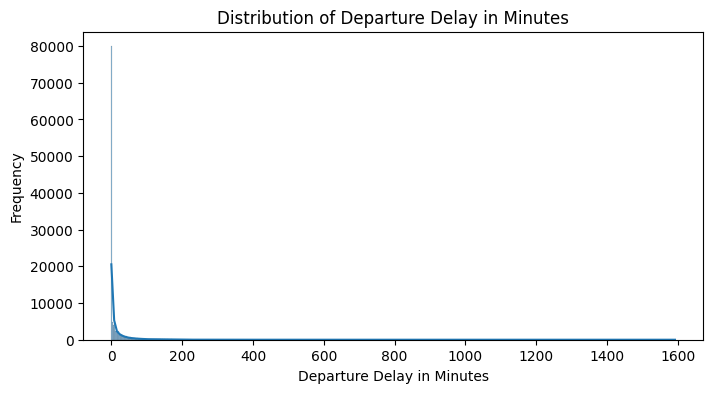

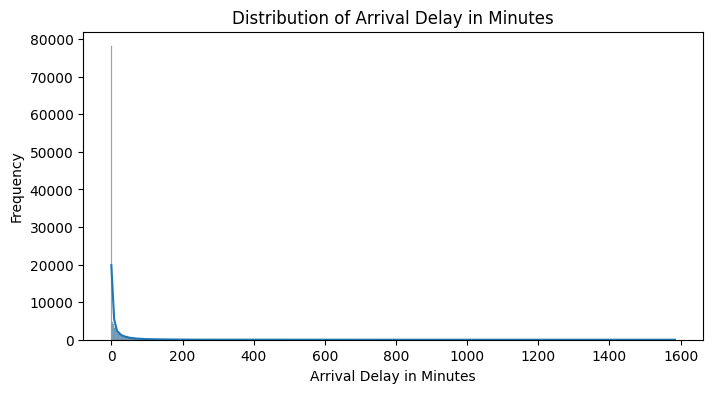

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [57]:
from sklearn.model_selection import train_test_split

X = df.drop('satisfaction', axis=1)
# X = df.select_dtypes(include=['float64', 'int64'])
X = pd.get_dummies(X, drop_first=True)
y_encoded = df['satisfaction'].map({'satisfied': 1, 'dissatisfied': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [58]:
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [59]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [60]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.9323606405913151


In [61]:
grid_search_params = {    
    'max_depth': [4, 6],
    'min_child_weight': [3, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [5, 10, 15],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

In [62]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(
    estimator=model,
    param_grid=grid_search_params,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,
    verbose=2
)

In [63]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7], 'learning_rate': [0.1, 0.2, ...], 'max_depth': [4, 6], 'min_child_weight': [3, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [64]:
print("Best params: ", grid_search.best_params_)

y_pred = grid_search.best_estimator_.predict(X_test)

Best params:  {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 15, 'subsample': 0.7}


In [65]:
from sklearn.metrics import f1_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
print("Tuned Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred)
print("Tuned F1 Score:", f1)

recall = recall_score(y_test, y_pred)
print("Tuned Recall:", recall)

precision = precision_score(y_test, y_pred)
print("Tuned Precision:", precision)

Tuned Accuracy: 0.9310132429935325
Tuned F1 Score: 0.9371536788945781
Tuned Recall: 0.9342703307461017
Tuned Precision: 0.9400548793358193
